In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
# plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.figsize'] = (10, 5)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("data/train.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**There are a lot of locations missings**

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
# Analysing null values
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
# Lets see the number of (rows, cols)
print(train_df.shape)

(7613, 5)


In [7]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

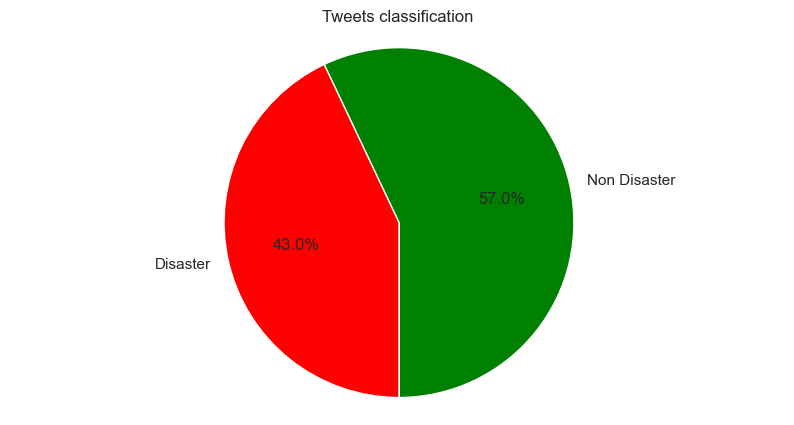

In [8]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Non Disaster', 'Disaster'

fig1, ax1 = plt.subplots()
ax1.pie(train_df['target'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=False, startangle=270, colors=['green','red'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Tweets classification')
plt.savefig('dataset_classification.png', dpi=100)
plt.show()

In [9]:
# Lets count the number of words and length
train_df['words_count'] = train_df['text'].apply(lambda x: len(x.lower().split()))
train_df['length'] = train_df['text'].apply(lambda x: len(x))
train_df.head()

,id,keyword,location,text,target,words_count,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88


In [10]:
train_df.describe(include='all')

,id,keyword,location,text,target,words_count,length
count,"7,613.00",7552,5080,7613,"7,613.00","7,613.00","7,613.00"
unique,nan,221,3341,7503,nan,nan,nan
top,nan,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,nan,nan,nan
freq,nan,45,104,10,nan,nan,nan
mean,"5,441.93",NaN,NaN,NaN,0.43,14.90,101.04
std,"3,137.12",NaN,NaN,NaN,0.50,5.73,33.78
min,1.00,NaN,NaN,NaN,0.00,1.00,7.00
25%,"2,734.00",NaN,NaN,NaN,0.00,11.00,78.00
50%,"5,408.00",NaN,NaN,NaN,0.00,15.00,107.00
75%,"8,146.00",NaN,NaN,NaN,1.00,19.00,133.00


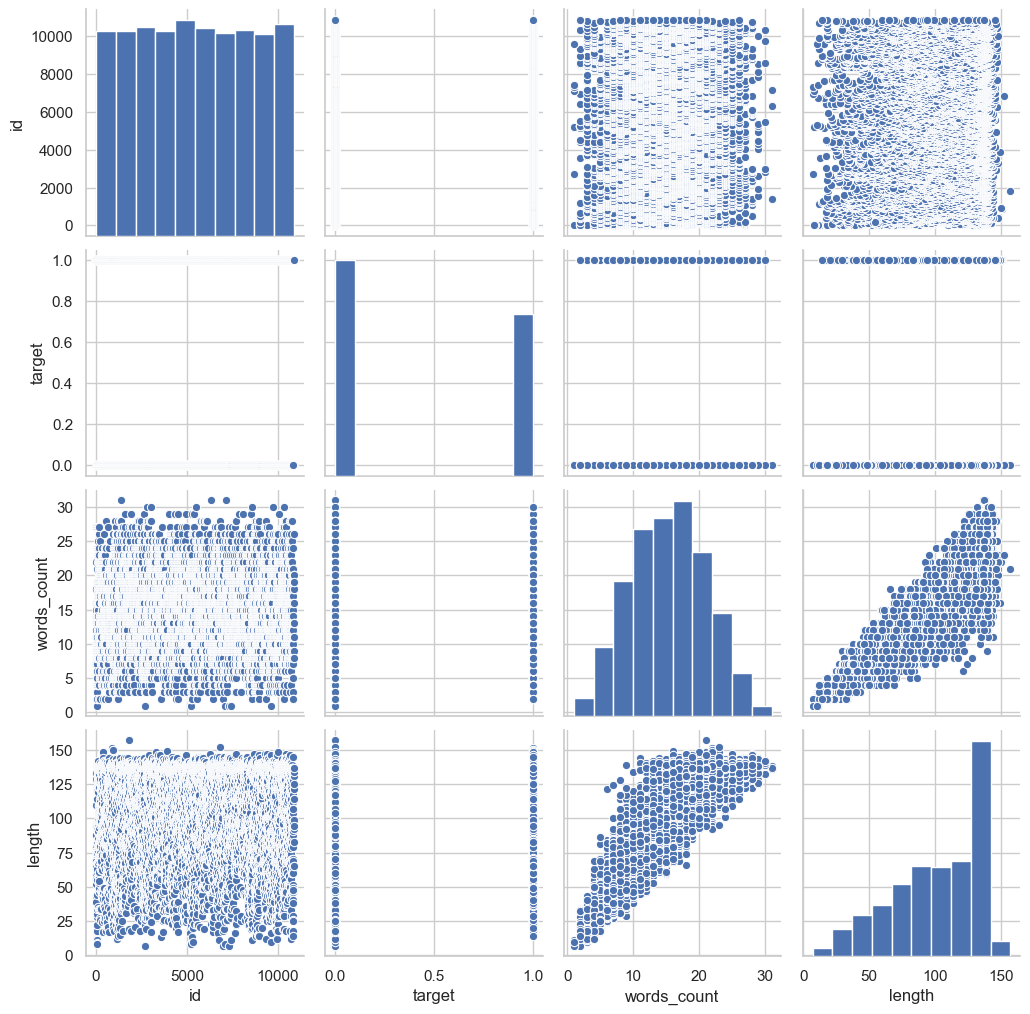

In [15]:
# correlations
plot = sns.pairplot(train_df)
plot.savefig("correlations.png")

**Lets analyze value counts for words count**

In [16]:
train_df['words_count'].value_counts()

11    497
18    494
17    494
16    451
14    450
13    445
15    425
12    415
20    409
19    390
9     363
10    334
21    296
8     293
22    279
7     242
23    220
24    189
6     186
5     159
25    129
4     115
26     98
3      75
27     60
28     41
2      34
29     13
1       8
30      6
31      3
Name: words_count, dtype: int64

In [17]:
train_df["words_count"].describe()

count               7,613.00
mean                   14.90
std                     5.73
min                     1.00
25%                    11.00
50%                    15.00
75%                    19.00
max                    31.00
Name: words_count, dtype: float64

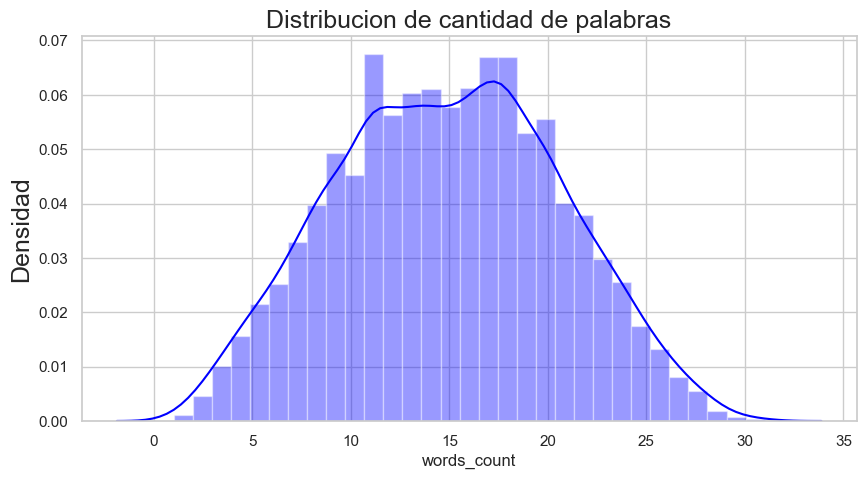

In [18]:
plot = sns.distplot(train_df["words_count"], color="blue", label='Word count for tweets', hist=True, bins=31)
plot.set_title("Distribucion de cantidad de palabras", fontsize=18)
plot.set_ylabel("Densidad", fontsize=18)
plot.figure.savefig('words_distrution.png', dpi=100)

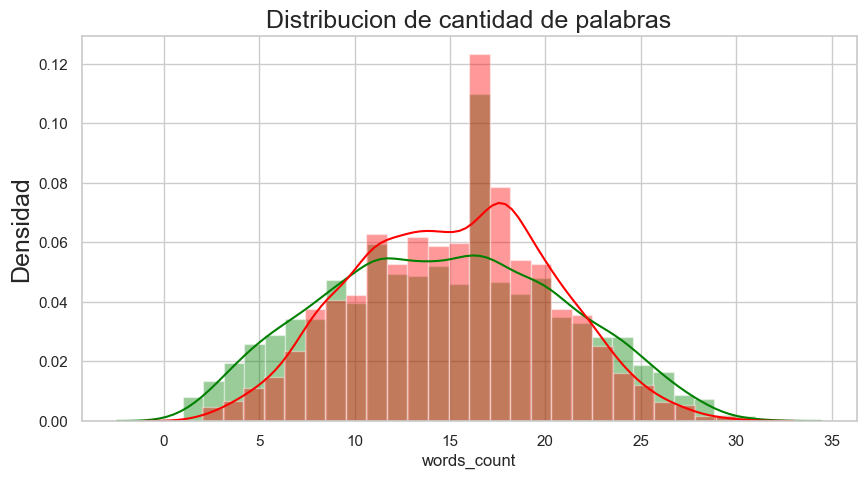

In [19]:
plot = sns.distplot(train_df[train_df["target"] == 0]["words_count"], color="green", label='Word count for fake disasters', hist=True)
plot = sns.distplot(train_df[train_df["target"] == 1]["words_count"], color="red", label='Word count for real disasters', hist=True)
plot.set_title("Distribucion de cantidad de palabras", fontsize=18)
plot.set_ylabel("Densidad", fontsize=18)
plot.figure.savefig('words_distrution_by_classification.png', dpi=100)

### As we can see words count have pretty similar distribution for real and fake disasters

### we can also see this in the correlation

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


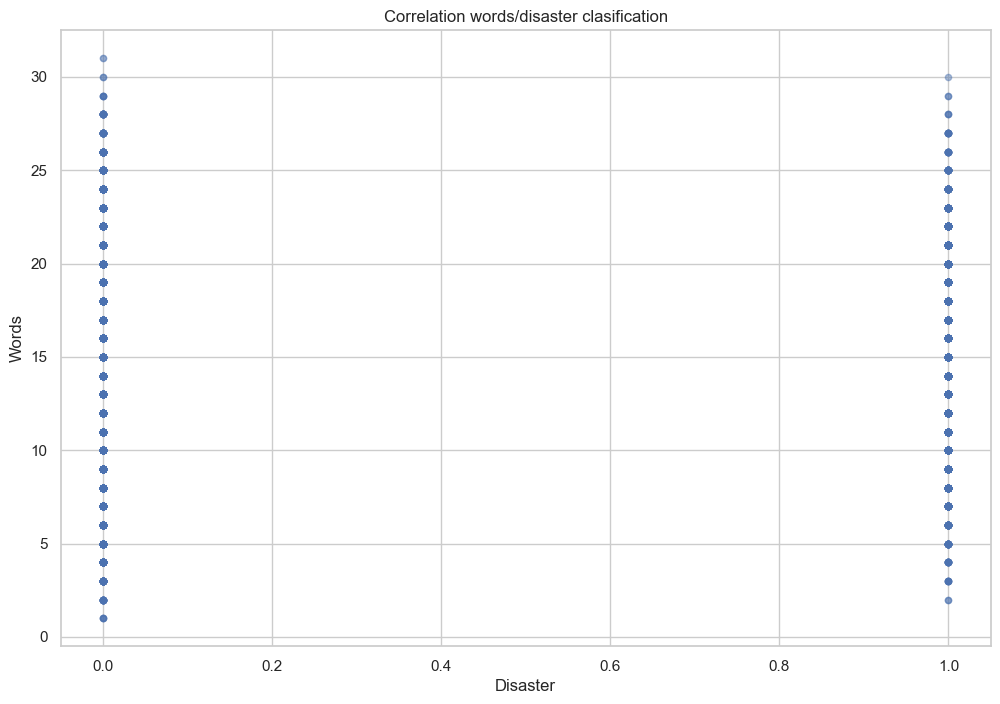

In [20]:
train_df.plot.scatter('target','words_count', title='Correlation words/disaster clasification',alpha=0.25,figsize=(12,8));
ax=plt.gca()
ax.set_ylabel('Words')
ax.set_xlabel('Disaster');
ax.figure.savefig('words_corr.png', dpi=100)

In [21]:
train_df.corr()

,id,target,words_count,length
id,1.00,0.06,0.01,0.02
target,0.06,1.00,0.04,0.18
words_count,0.01,0.04,1.00,0.84
length,0.02,0.18,0.84,1.00


### it doent look like there is a strong correlationship between them, 
### Lets analyze similar analysis for tweet length

In [22]:
train_df['length'].value_counts()

136    401
139    275
138    256
140    218
137    210
      ... 
150      2
151      1
152      1
149      1
157      1
Name: length, Length: 147, dtype: int64

In [23]:
train_df["length"].describe()

count               7,613.00
mean                  101.04
std                    33.78
min                     7.00
25%                    78.00
50%                   107.00
75%                   133.00
max                   157.00
Name: length, dtype: float64

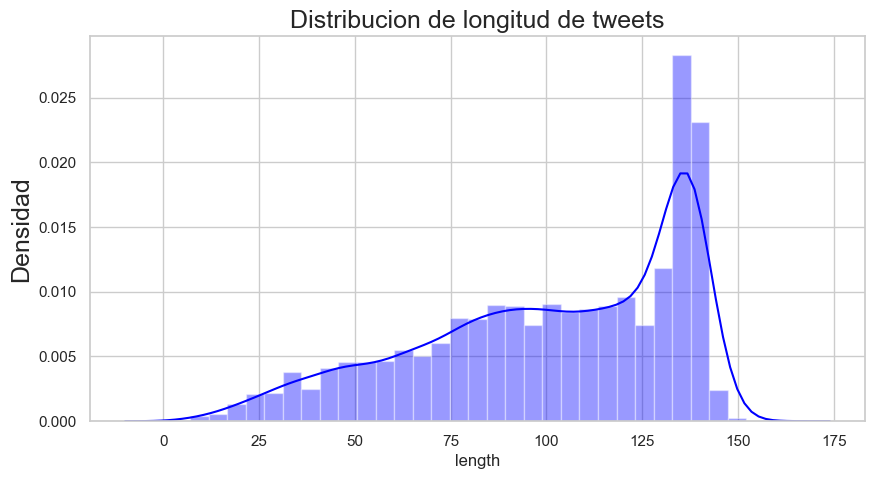

In [24]:
plot = sns.distplot(train_df["length"], color="blue", label='Tweet length', hist=True, bins=31)
plot.set_title("Distribucion de longitud de tweets", fontsize=18)
plot.set_ylabel("Densidad", fontsize=18)
plot.figure.savefig('length_distrution.png', dpi=100)

In [25]:
train_df[train_df["target"] == 0]["length"].describe()

count               4,342.00
mean                   95.71
std                    35.89
min                     7.00
25%                    68.00
50%                   101.00
75%                   130.00
max                   157.00
Name: length, dtype: float64

In [26]:
train_df[train_df["target"] == 1]["length"].describe()

count               3,271.00
mean                  108.11
std                    29.31
min                    14.00
25%                    88.00
50%                   115.00
75%                   136.00
max                   151.00
Name: length, dtype: float64

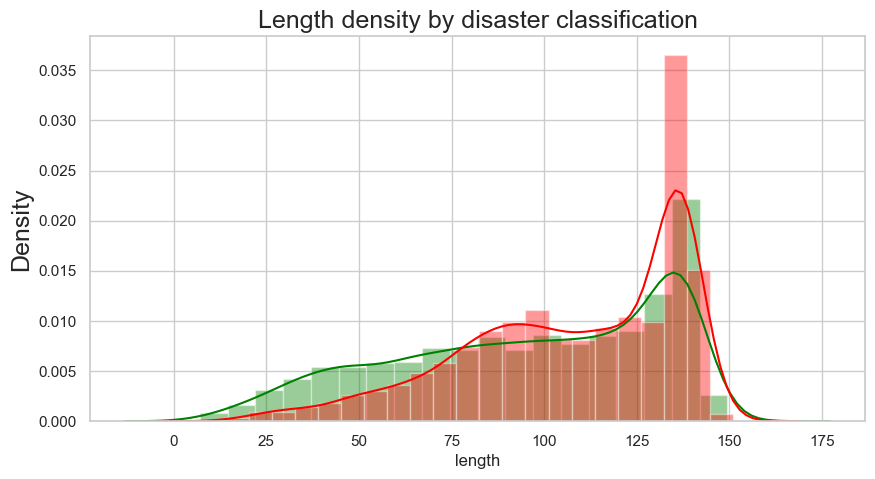

In [27]:
plot = sns.distplot(train_df[train_df["target"] == 0]["length"], color="green", label='Fake disasters', hist=True)
plot = sns.distplot(train_df[train_df["target"] == 1]["length"], color="red", label='Real disasters', hist=True)

plot.set_title("Length density by disaster classification", fontsize=18)
plot.set_ylabel("Density", fontsize=18)
plot.figure.savefig('words_distrution_by_classification.png', dpi=100)

In [28]:
train_df.loc[(train_df["target"] == 0) & (train_df["length"] < 15)].shape[0]/train_df.loc[train_df["length"] < 15].shape[0]

0.9629629629629629

In [29]:
train_df.loc[(train_df["target"] == 0) & (train_df["length"] < 50)].shape[0]/train_df.loc[train_df["length"] < 50].shape[0]

0.807843137254902

In [30]:
train_df.loc[train_df["length"] < 50].shape[0]/train_df.loc[train_df["length"]].shape[0]

0.10048601077104952

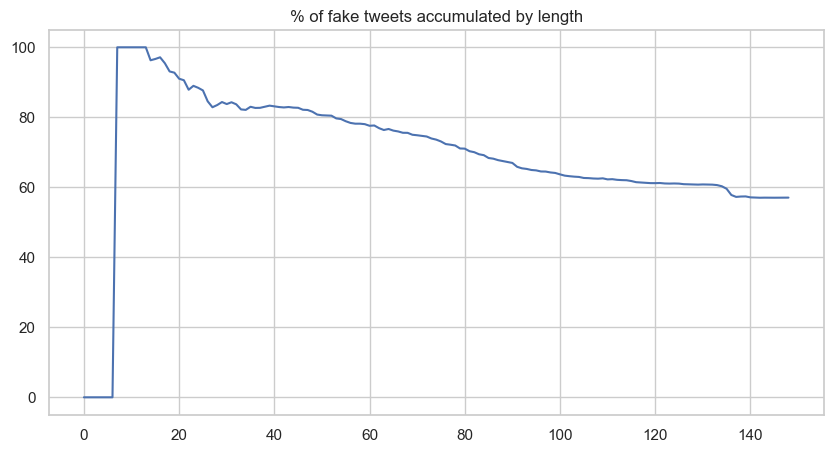

In [31]:
series = [train_df.loc[(train_df["target"] == 0) & (train_df["length"] < x)].shape[0]/train_df.loc[train_df["length"] < x].shape[0] \
               if train_df.loc[train_df["length"] < x].shape[0] > 0 else 0 for x in range(1, 150)]
pd_series = pd.Series(series)
pd_series = pd_series*100
p = pd_series.plot.line(title='% of fake tweets accumulated by length')
p.figure.savefig('acummulated_non_disaster_by_length.png', dpi=100)

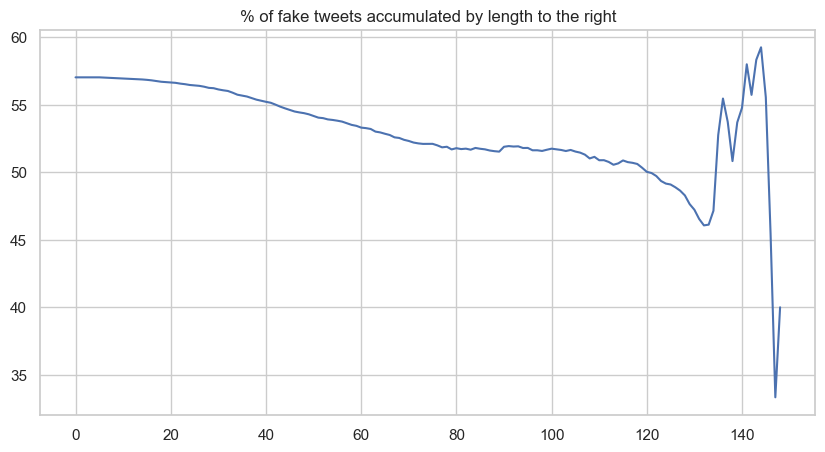

In [32]:
series = [train_df.loc[(train_df["target"] == 0) & (train_df["length"] > x)].shape[0]/train_df.loc[train_df["length"] > x].shape[0] \
               if train_df.loc[train_df["length"] > x].shape[0] > 0 else 0 for x in range(1, 150)]
pd_series = pd.Series(series)
pd_series = pd_series*100
plot = pd_series.plot.line(title='% of fake tweets accumulated by length to the right')
plot.figure.savefig('acummulated_to_right_non_disaster_by_length.png', dpi=100)

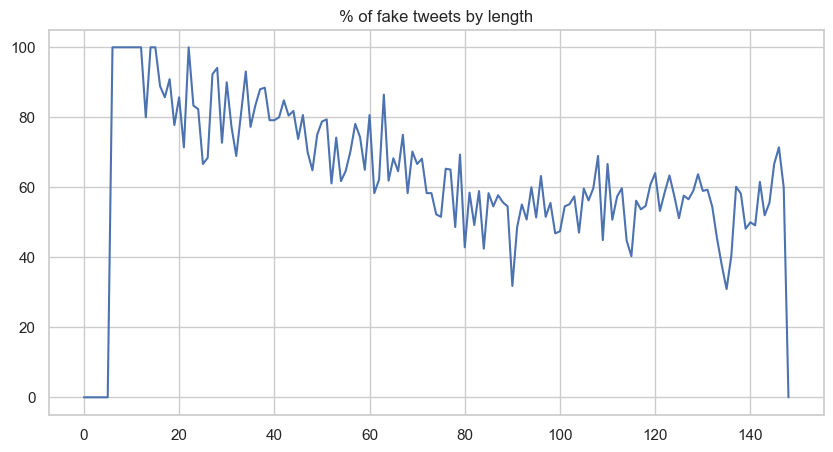

In [33]:
series = [train_df.loc[(train_df["target"] == 0) & (train_df["length"] == x)].shape[0]/train_df.loc[train_df["length"] == x].shape[0] \
               if train_df.loc[train_df["length"] == x].shape[0] > 0 else 0 for x in range(1, 150)]
pd_series = pd.Series(series)
pd_series = pd_series*100
plot = pd_series.plot.line(title='% of fake tweets by length')
plot.figure.savefig('pge_fake_tweets_by_length.png', dpi=100)

As we can see for really short tweets there is hight change of being fake
80% of short tweets (50 chars or less) announce fake disasters
96% of short tweets (15 chars or less) announce fake disasters

### Lets analyze the keywords

In [34]:
# Lets make it lower case
NULL_PLACEHOLDER = 'NULL_PLACEHOLDER_A1234131'.lower()
train_df['keyword'] = train_df['keyword'].fillna(NULL_PLACEHOLDER).apply(lambda x :x.lower()).replace(NULL_PLACEHOLDER,np.nan)
train_df.keyword.describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [35]:
train_df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [36]:
train_df['keyword'].value_counts().describe()

count                 221.00
mean                   34.17
std                     4.79
min                     9.00
25%                    33.00
50%                    35.00
75%                    37.00
max                    45.00
Name: keyword, dtype: float64

In [37]:
mean = train_df['keyword'].value_counts().mean()
mean

34.171945701357465

### Lets take 35 as a high number of keyword apparence

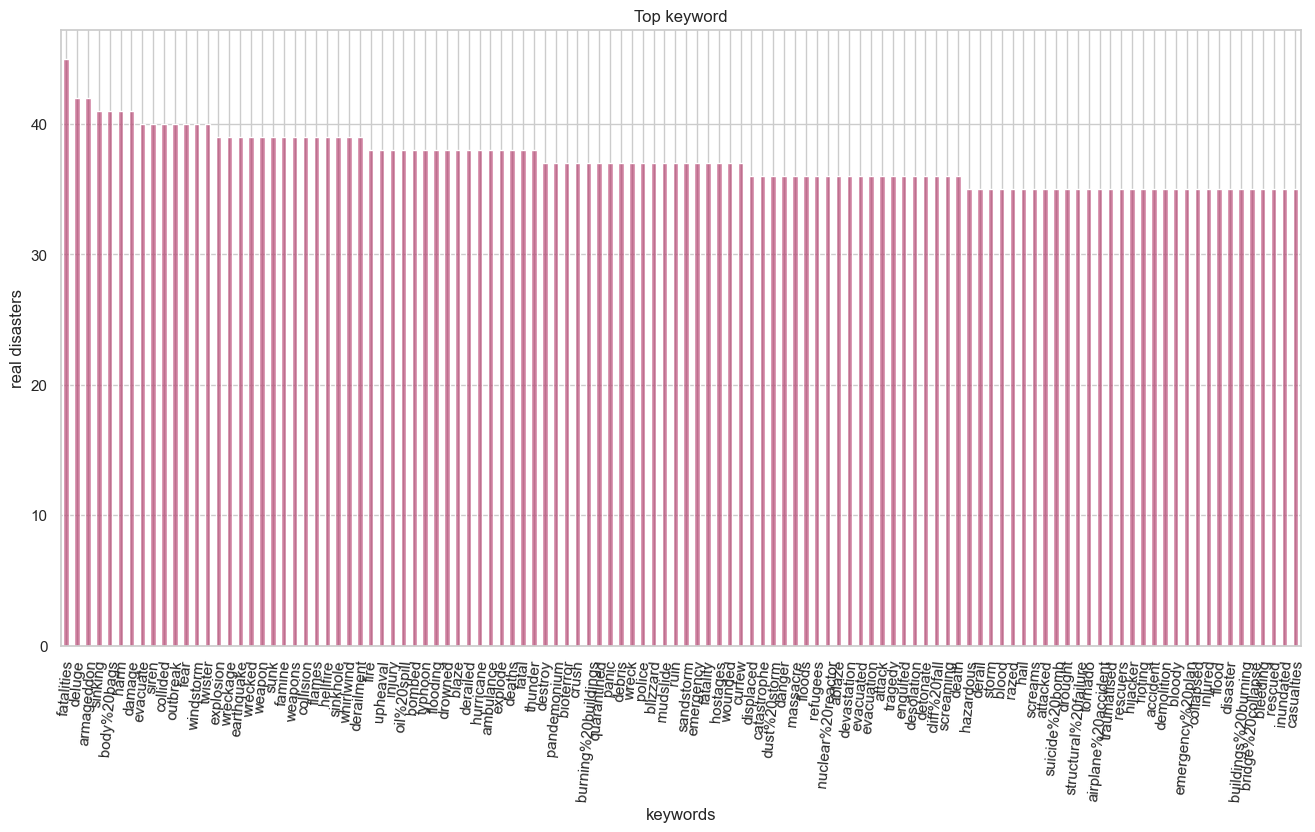

In [38]:
plot = train_df['keyword'].value_counts()[(train_df['keyword'].value_counts() > mean)].plot(kind='bar',figsize=(16,8),rot=85,title='Top keyword',color=(0.7, 0.2, 0.4, 0.6));
plot.set_ylabel('real disasters');
plot.set_xlabel('keywords')
plot.figure.savefig('top_keywords.png', dpi=100)

Lets take analyze keywords over 39 to keep the most representative values only

In [39]:
kw_more_than_38 = train_df.groupby("keyword").filter(lambda x: len(x) >= 39)

In [40]:
top_kw = kw_more_than_38.groupby('keyword').agg({'target': ['sum','count', 'mean', 'std'], 'length': ['mean', 'std']})
level0 = top_kw.columns.get_level_values(0)
level1 = top_kw.columns.get_level_values(1)
top_kw.columns = level0 + '_' + level1
top_kw = top_kw.reset_index()
top_kw['negative_cases'] = top_kw['target_count'] - top_kw['target_sum']
top_kw

,keyword,target_sum,target_count,target_mean,target_std,length_mean,length_std,negative_cases
0,armageddon,5,42,0.12,0.33,102.02,33.40,37
1,body%20bags,1,41,0.02,0.16,100.78,37.69,40
2,collided,23,40,0.57,0.50,117.03,28.10,17
3,collision,29,39,0.74,0.44,101.33,24.18,10
4,damage,19,41,0.46,0.50,93.73,37.47,22
5,deluge,6,42,0.14,0.35,111.17,30.27,36
6,derailment,39,39,1.00,0.00,109.79,25.09,0
7,earthquake,30,39,0.77,0.43,107.64,34.69,9
8,evacuate,25,40,0.62,0.49,100.05,30.59,15
9,explosion,20,39,0.51,0.51,108.67,28.26,19


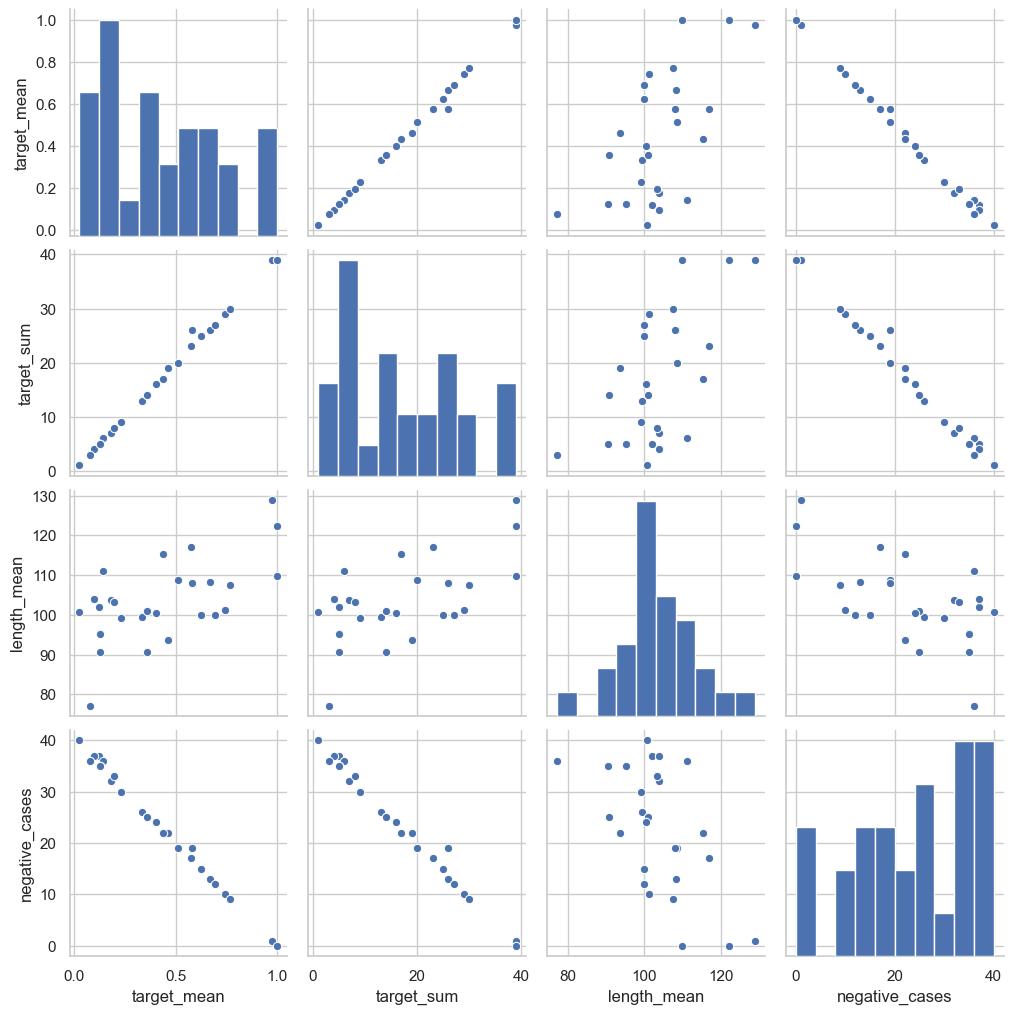

In [41]:
# correlations
corr_df = top_kw[['target_mean', 'target_sum', 'length_mean', 'negative_cases']]
plot = sns.pairplot(corr_df)
plot.savefig('agg_corr.png', dpi=100)

In [42]:
corr_df.corr()

,target_mean,target_sum,length_mean,negative_cases
target_mean,1.00,1.00,0.62,-1.00
target_sum,1.00,1.00,0.62,-0.99
length_mean,0.62,0.62,1.00,-0.59
negative_cases,-1.00,-0.99,-0.59,1.00


In [43]:
top_kw.describe()

,target_sum,target_count,target_mean,target_std,length_mean,length_std,negative_cases
count,28.00,28.00,28.00,28.00,28.00,28.00,28.00
mean,16.93,39.96,0.43,0.38,103.40,31.15,23.04
std,11.77,1.37,0.30,0.15,10.28,5.45,12.11
min,1.00,39.00,0.02,0.00,77.15,16.01,0.00
25%,5.75,39.00,0.14,0.33,99.39,27.57,14.50
50%,15.00,39.50,0.38,0.43,101.68,30.93,24.50
75%,26.00,40.25,0.64,0.49,108.38,36.30,35.00
max,39.00,45.00,1.00,0.51,128.93,39.93,40.00


### This only represents 15% of the dataset

In [44]:
top_kw['target_count'].sum()/train_df.shape[0]

0.1469854196768685

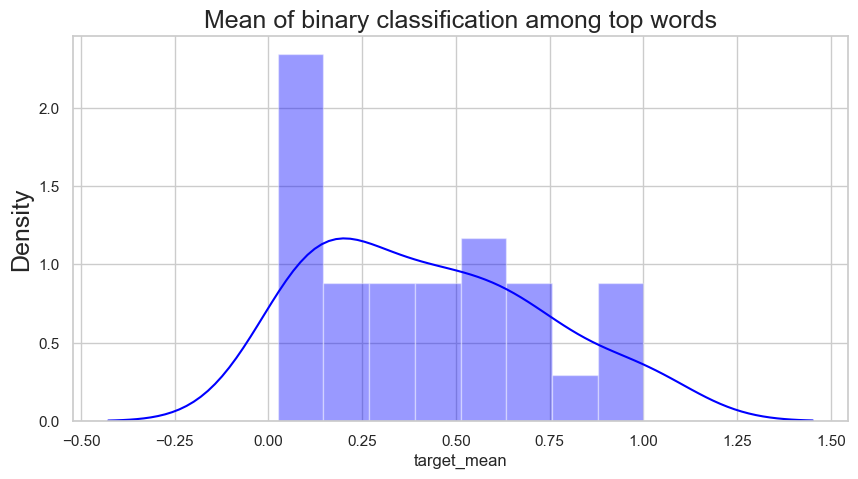

In [45]:
plot = sns.distplot(top_kw["target_mean"], color="blue", label='Classification distribution', hist=True, bins=8)
plot.set_title("Mean of binary classification among top words", fontsize=18)
plot.set_ylabel("Density", fontsize=18)
plot.figure.savefig('mean_of_binary_classification_among_topwords.png', dpi=100)

## As we can see, there are a lot of top keyword associated with contributing fake cases
this words are (mean < 0.15):

In [46]:
kw_low_mean = top_kw[top_kw['target_mean'] < 0.15]
kw_low_mean

,keyword,target_sum,target_count,target_mean,target_std,length_mean,length_std,negative_cases
0,armageddon,5,42,0.12,0.33,102.02,33.40,37
1,body%20bags,1,41,0.02,0.16,100.78,37.69,40
5,deluge,6,42,0.14,0.35,111.17,30.27,36
12,fear,5,40,0.12,0.33,95.33,39.93,35
14,harm,4,41,0.10,0.30,103.98,33.21,37
19,siren,5,40,0.12,0.33,90.58,36.37,35
21,twister,5,40,0.12,0.33,95.30,36.69,35
27,wrecked,3,39,0.08,0.27,77.15,32.11,36


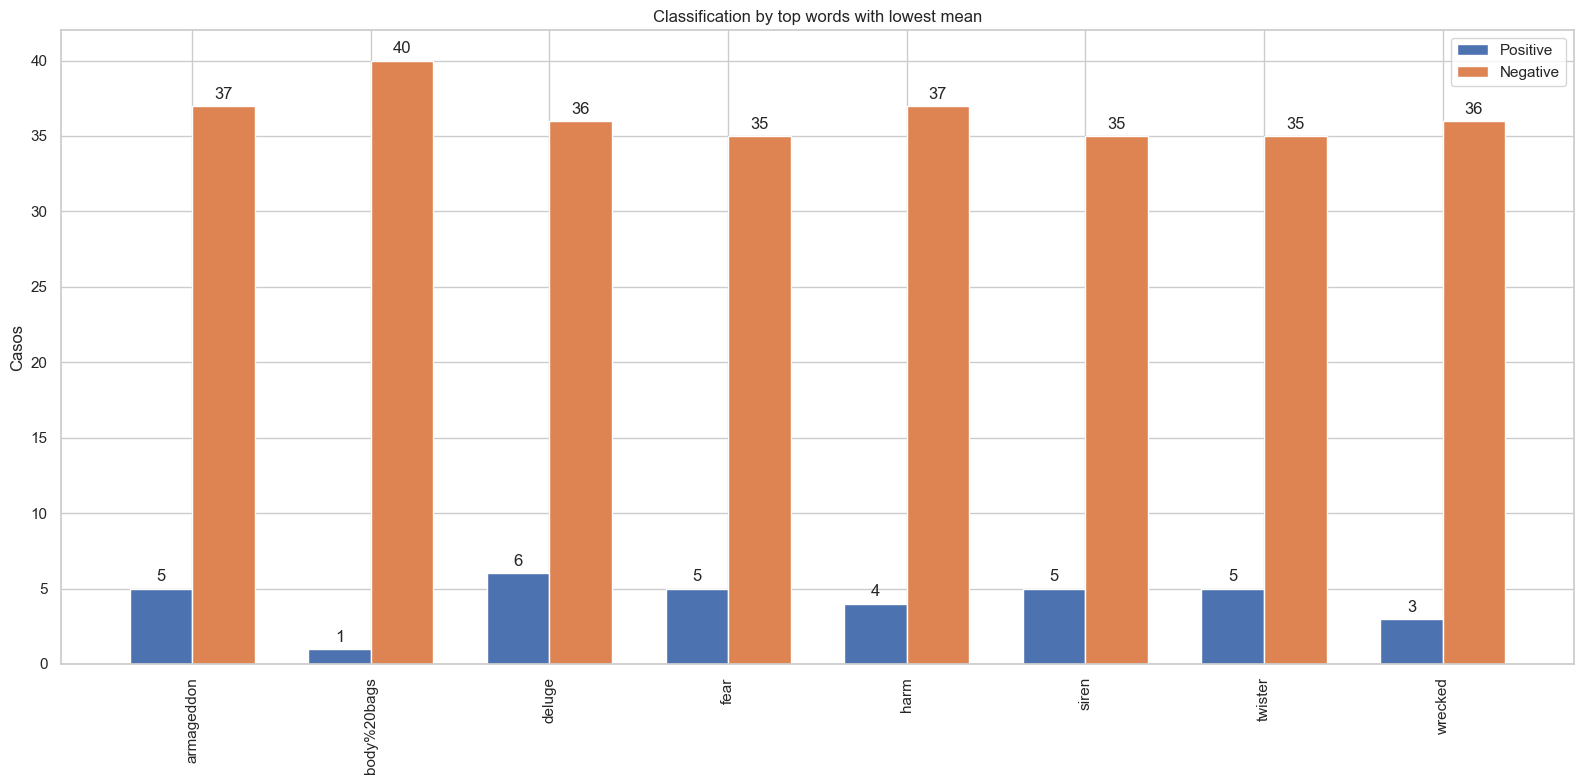

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = list(top_kw[top_kw['target_mean'] < 0.15]['keyword'])
postive_cases = list(top_kw[top_kw['target_mean'] < 0.15]['target_sum'])
negative_cases = list(top_kw[top_kw['target_mean'] < 0.15]['negative_cases'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width/2, postive_cases, width, label='Positive')
rects2 = ax.bar(x + width/2, negative_cases, width, label='Negative')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Casos')
ax.set_title('Classification by top words with lowest mean')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('kw_classification_by_lowest_mean.png', dpi=300)
plt.show()


Lets take a look at the ones with high mean (> 0.75)

In [48]:
kw_top_mean = top_kw[top_kw['target_mean'] > 0.75]
kw_top_mean

,keyword,target_sum,target_count,target_mean,target_std,length_mean,length_std,negative_cases
6,derailment,39,39,1.00,0.00,109.79,25.09,0
7,earthquake,30,39,0.77,0.43,107.64,34.69,9
16,outbreak,39,40,0.97,0.16,128.93,16.01,1
26,wreckage,39,39,1.00,0.00,122.26,24.76,0


### Lets analyze the locations

In [49]:
train_df['location'] = train_df['location'].fillna(NULL_PLACEHOLDER).apply(lambda x :x.lower()).replace(NULL_PLACEHOLDER,np.nan)
train_df['location'].describe()

count     5080
unique    3233
top        usa
freq       104
Name: location, dtype: object

In [50]:
train_df['location'].head(100)

0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
              ...         
95               charlotte
96         baton rouge, la
97          hagerstown, md
98    gloucestershire , uk
99                     NaN
Name: location, Length: 100, dtype: object

In [51]:
real_location_counts = train_df['location'].value_counts()
real_location_counts.head(100)

usa              104
new york          75
united states     50
london            49
canada            33
                ... 
asheville, nc      5
calgary, ab        5
philippines        5
maryland           5
puerto rico        5
Name: location, Length: 100, dtype: int64

In [52]:
not_nulls = train_df.dropna(subset=['location'])
ny = not_nulls[not_nulls['location'].str.contains("new") | not_nulls['location'].str.contains("ny")]['location'].value_counts()
ny.head(50)

new york                                           75
kenya                                              21
new york, ny                                       16
nyc                                                15
new york city                                      10
ny                                                  6
newcastle                                           6
paterson, new jersey                                6
brooklyn, ny                                        6
new jersey                                          5
new york, usa                                       5
new hampshire                                       5
nairobi-kenya                                       4
germany                                             4
sydney, new south wales                             4
anonymous                                           3
manhattan, ny                                       3
nyc :) ex- #islamophobe                             3
financial news and views    

In [53]:
berlin = not_nulls[not_nulls['location'].str.contains("washington")]['location'].value_counts()
berlin

washington, dc                    21
washington, d.c.                  14
seattle, washington                4
washington dc                      3
washington d.c.                    3
washington state                   3
washington                         2
washington, dc & charlotte, nc     2
washington, usa                    2
#washingtonstate #seattle          1
washington, d.c., area             1
washington,dc                      1
washington, dc 20009               1
tacoma,washington                  1
benton city, washington            1
oregon and washington              1
washington, dc native              1
spokane, washington 99206          1
tulalip, washington                1
spokane, washington                1
wherever-the-fuck washington       1
nbc washington                     1
washington dc / nantes, france     1
western washington                 1
washington, krasnodar (russia)     1
washington, d.c.                   1
zboyer@washingtontimes.com         1
N

### Words analysis

In [54]:
train_df['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [55]:
# based on: https://sigdelta.com/blog/text-analysis-in-pandas/
# https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words)) if len(words) > 0 else 0

from textblob import TextBlob
from nltk.corpus import stopwords
stop = stopwords.words('english')

train_df['links'] = train_df['text'].str.count('http')
train_df['stopwords'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
train_df['hashtags'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train_df['mentions'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
train_df['numerics'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train_df['upper'] = train_df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train_df['avg_word'] = train_df['text'].apply(lambda x: avg_word(x))
train_df.head()

,id,keyword,location,text,target,words_count,length,links,stopwords,hashtags,mentions,numerics,upper,avg_word
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,0,5,1,0,0,1,4.38
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,0,0,0,0,0,0,4.57
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133,0,9,0,0,0,0,5.09
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65,0,1,1,0,0,0,7.12
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88,0,6,2,0,0,0,4.50


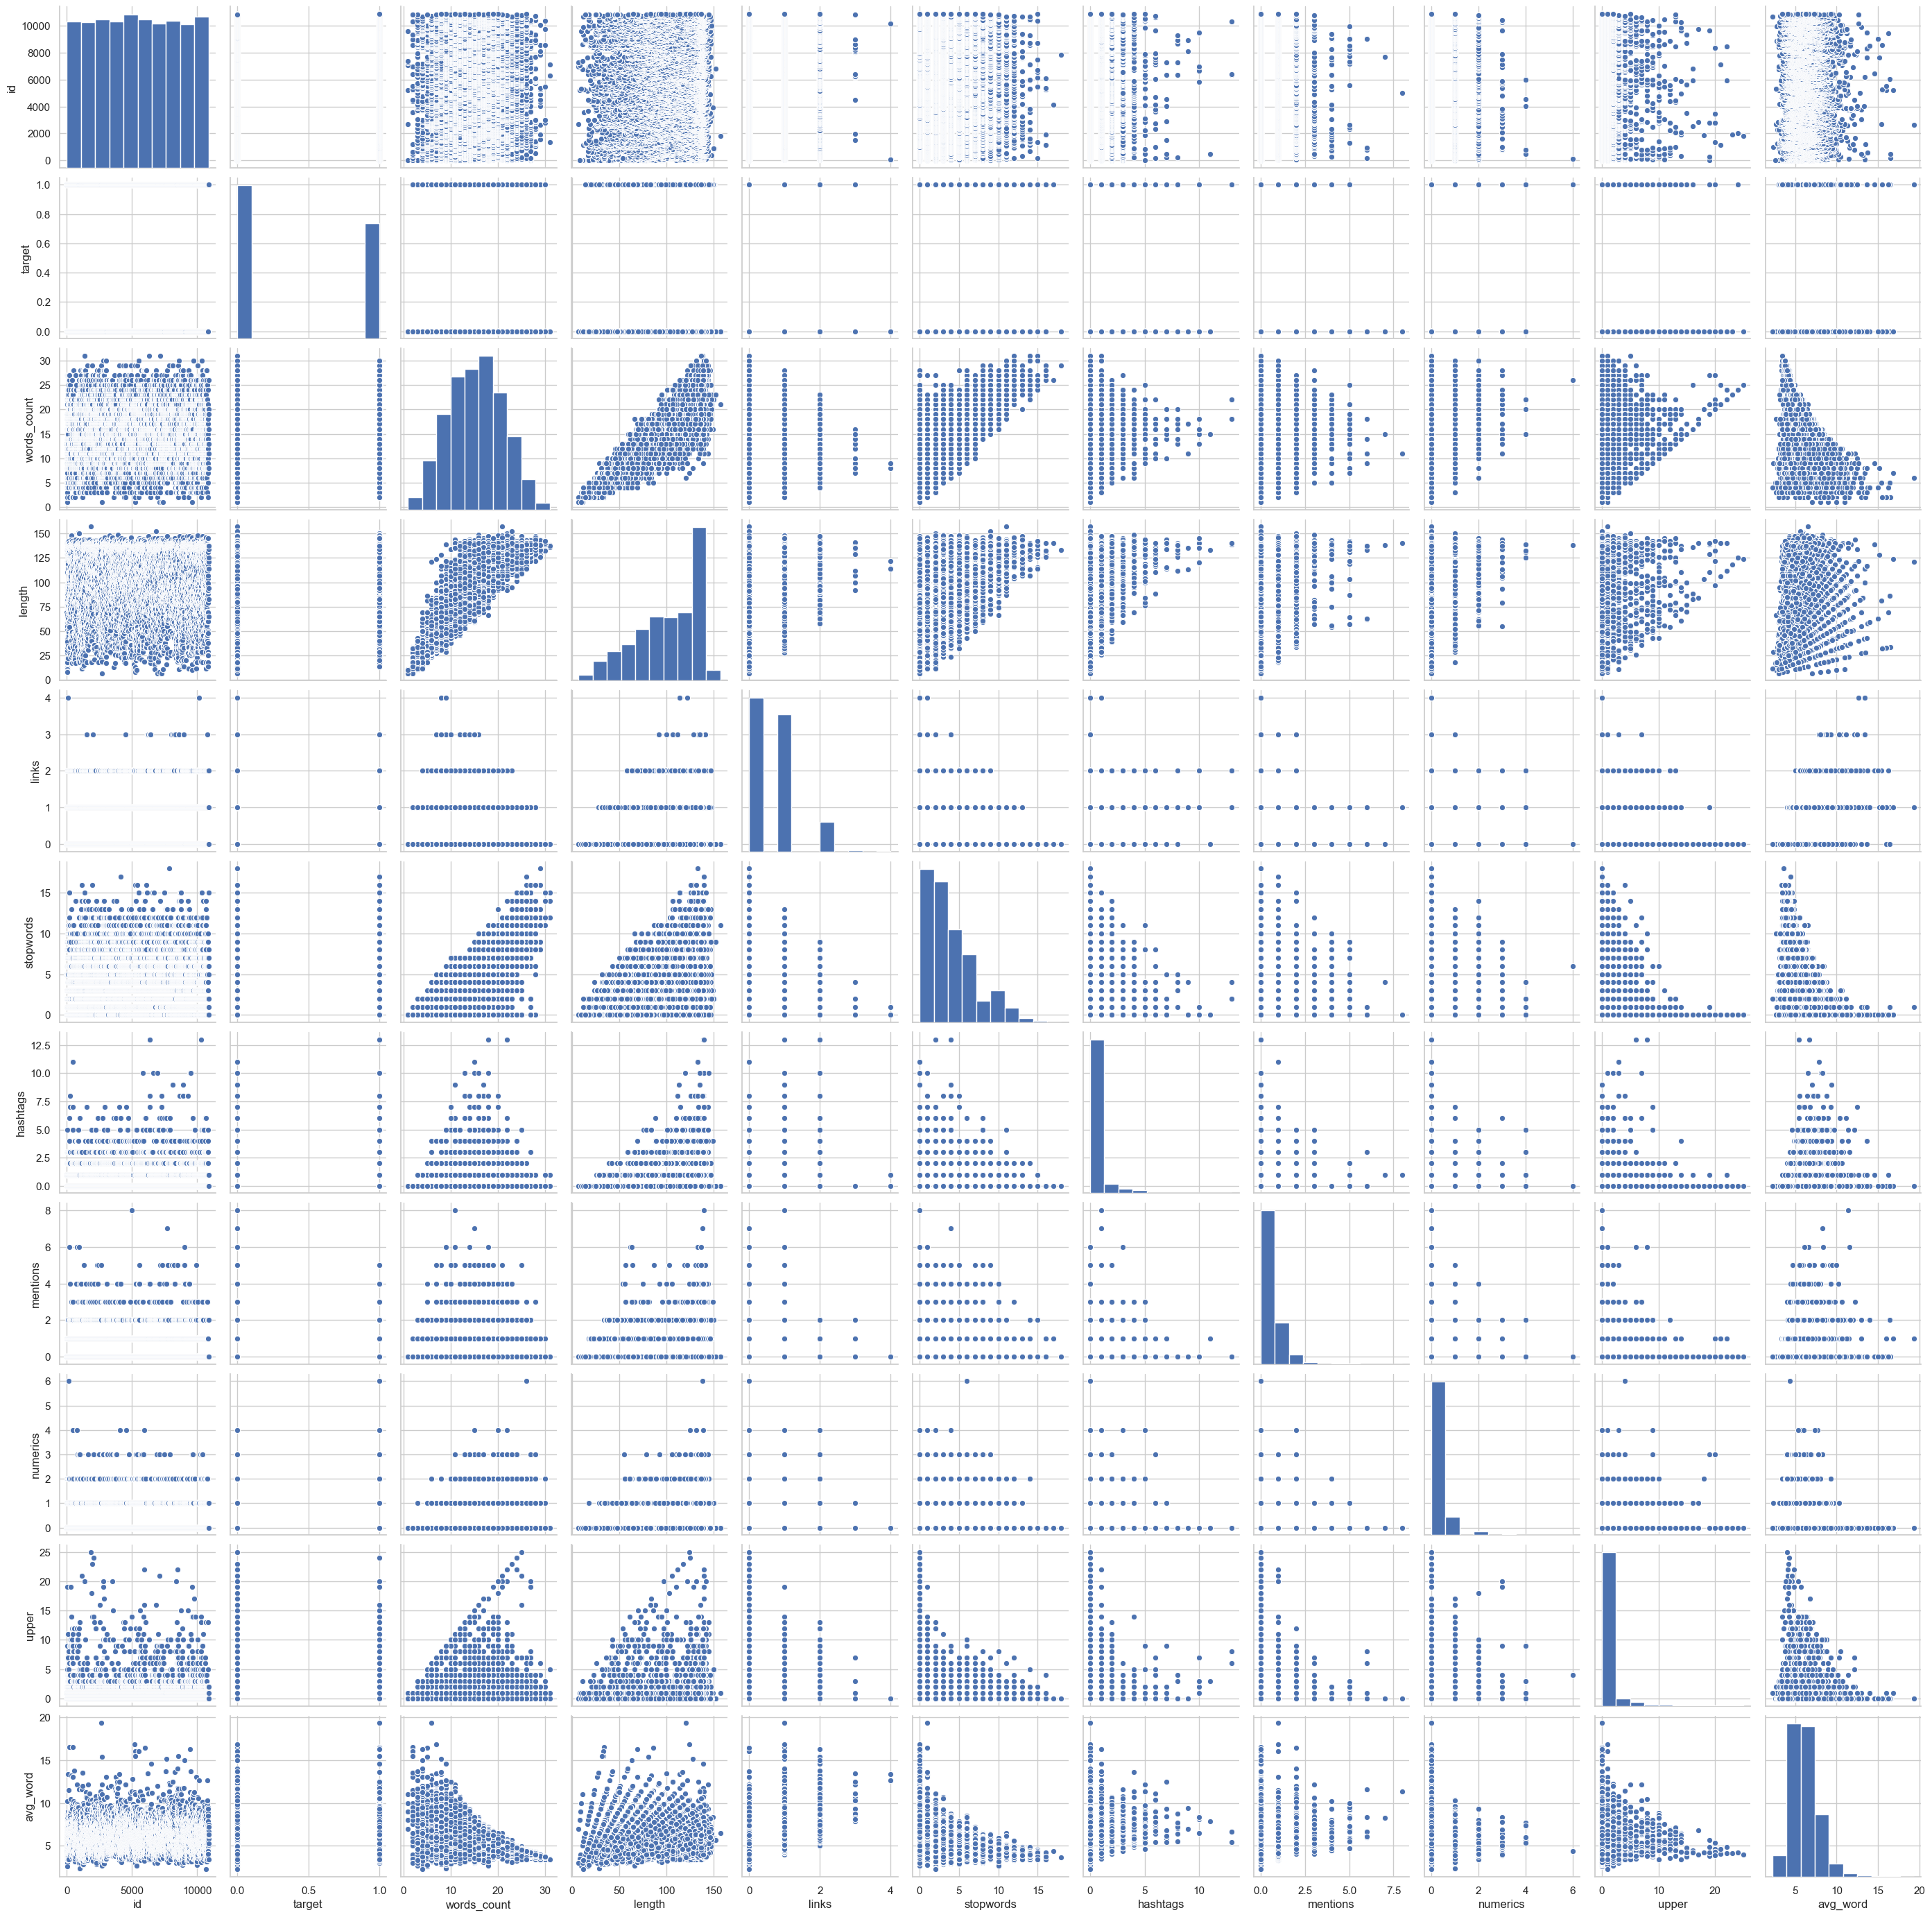

In [56]:
plot = sns.pairplot(train_df)
plot.savefig("correlations.png")

In [57]:
train_df.corr()

,id,target,words_count,length,links,stopwords,hashtags,mentions,numerics,upper,avg_word
id,1.00,0.06,0.01,0.02,0.01,-0.00,0.00,-0.03,-0.02,-0.00,0.01
target,0.06,1.00,0.04,0.18,0.20,-0.08,0.06,-0.10,0.10,-0.01,0.18
words_count,0.01,0.04,1.00,0.84,-0.12,0.73,0.05,0.04,0.16,0.14,-0.45
length,0.02,0.18,0.84,1.00,0.30,0.41,0.21,0.05,0.16,0.11,0.04
links,0.01,0.20,-0.12,0.30,1.00,-0.40,0.18,-0.23,0.07,0.02,0.64
stopwords,-0.00,-0.08,0.73,0.41,-0.40,1.00,-0.11,0.07,-0.04,-0.13,-0.57
hashtags,0.00,0.06,0.05,0.21,0.18,-0.11,1.00,-0.05,0.03,0.05,0.19
mentions,-0.03,-0.10,0.04,0.05,-0.23,0.07,-0.05,1.00,-0.04,0.01,0.01
numerics,-0.02,0.10,0.16,0.16,0.07,-0.04,0.03,-0.04,1.00,0.08,-0.05
upper,-0.00,-0.01,0.14,0.11,0.02,-0.13,0.05,0.01,0.08,1.00,-0.08


In [77]:
# Preprocessing
# removing punctuation
train_df['text'] = train_df['text'].str.replace('[^\w\s]','')
# Lower case
train_df['text'] = train_df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# remove stop words
# train_df['text'] = train_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# remove links
train_df['text'] = train_df['text'].str.replace('http\S+|www.\S+', '', case=False)
train_df

,id,keyword,location,text,target,words_count,length,links,stopwords,hashtags,mentions,numerics,upper,avg_word,links2,words
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,13,69,0,5,1,0,0,1,4.38,0,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,7,38,0,0,0,0,0,0,4.57,0,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,22,133,0,9,0,0,0,0,5.09,0,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,8,65,0,1,1,0,0,0,7.12,0,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,16,88,0,6,2,0,0,0,4.50,0,"[just, got, sent, this, photo, from, ruby, ala..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1,11,83,1,2,0,0,0,0,6.64,0,"[two, giant, cranes, holding, a, bridge, colla..."
7609,10870,NaN,NaN,aria_ahrary thetawniest the out of control wil...,1,20,125,0,7,0,2,0,0,5.30,0,"[aria, ahrary, thetawniest, the, out, of, cont..."
7610,10871,NaN,NaN,m194 0104 utc5km s of volcano hawaii,1,8,65,1,1,0,0,0,2,7.25,0,"[m194, 0104, utc5km, s, of, volcano, hawaii]"
7611,10872,NaN,NaN,police investigating after an ebike collided w...,1,19,137,0,5,0,0,0,0,6.26,0,"[police, investigating, after, an, ebike, coll..."


In [78]:
# Lets see most common words
freq = pd.Series(' '.join(train_df['text']).split()).value_counts()[:15]
freq

the     3262
a       2176
in      1977
to      1945
of      1823
and     1418
i       1370
is       944
for      890
on       853
you      793
my       675
with     572
it       567
that     561
dtype: int64

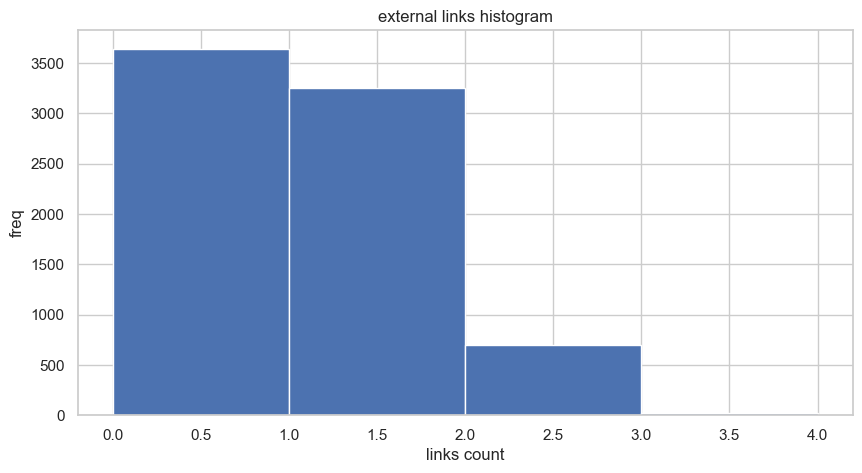

In [79]:
plot = train_df["links"].hist(bins=4)
plot.set_title('external links histogram')
plot.set_xlabel('links count')
plot.set_ylabel('freq')
plot.figure.savefig("links.png")

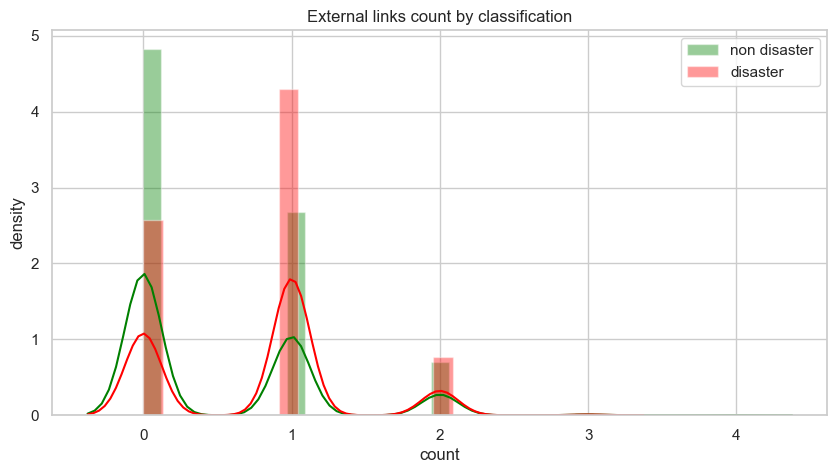

In [80]:
x = train_df[train_df["target"] == 0]["links"]
y = train_df[train_df["target"] == 1]["links"]

plt.figure()
sns.distplot(x, label='non disaster', color="green")
sns.distplot(y, label='disaster', color="red")
plt.legend()
plt.title('External links count by classification')
plt.xlabel('count')
plt.ylabel('density')
plt.savefig("links.png")
plt.show()

In [81]:
len(x[x>0])

1799

In [82]:
len(y[y>0])

2172

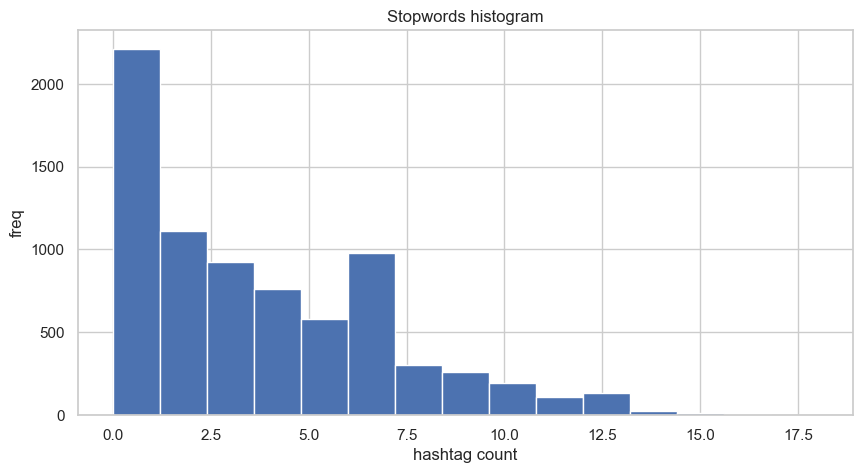

In [83]:
plot = train_df["stopwords"].hist(bins=15)
plot.set_title('Stopwords histogram')
plot.set_xlabel('hashtag count')
plot.set_ylabel('freq')
plot.figure.savefig("stopwords.png")

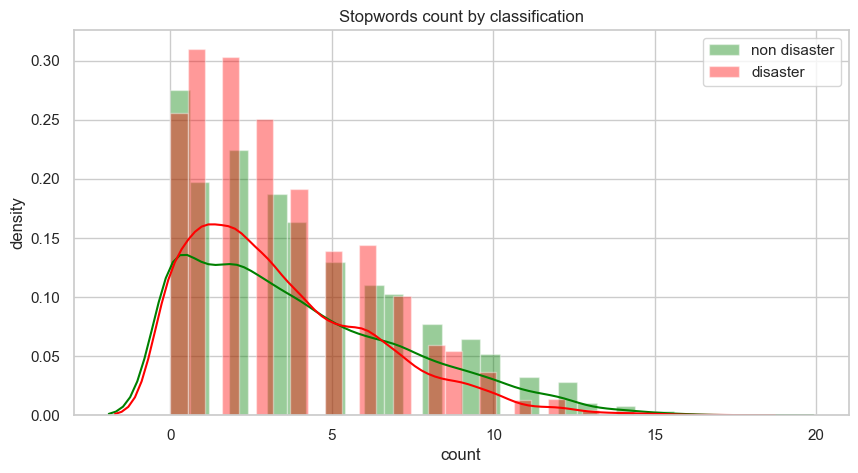

In [84]:
x = train_df[train_df["target"] == 0]["stopwords"]
y = train_df[train_df["target"] == 1]["stopwords"]

plt.figure()
sns.distplot(x, label='non disaster', color="green")
sns.distplot(y, label='disaster', color="red")
plt.legend()
plt.title('Stopwords count by classification')
plt.xlabel('count')
plt.ylabel('density')
plt.savefig(".png")
plt.show()

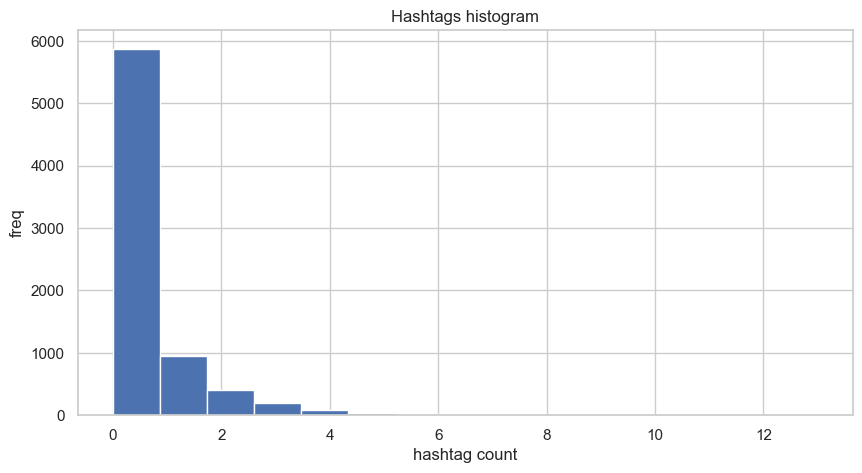

In [85]:
plot = train_df["hashtags"].hist(bins=15)
plot.set_title('Hashtags histogram')
plot.set_ylabel('freq')
plot.set_xlabel('hashtag count')
plot.figure.savefig("hashtags.png")

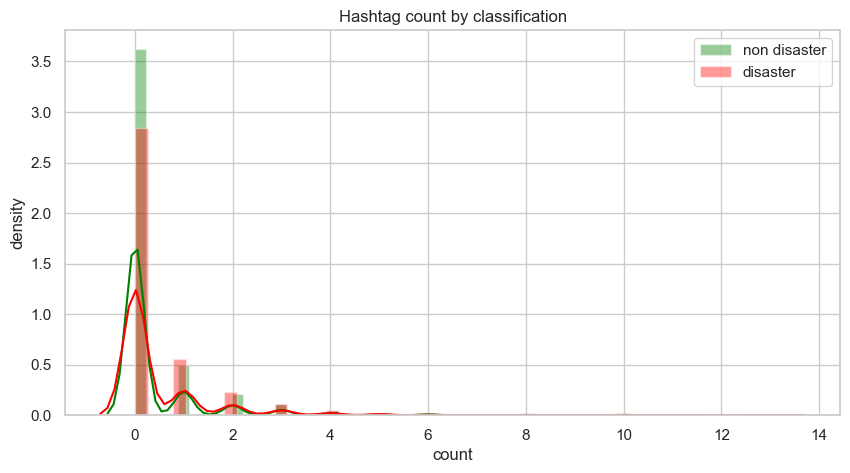

In [86]:
x = train_df[train_df["target"] == 0]["hashtags"]
y = train_df[train_df["target"] == 1]["hashtags"]

plt.figure()
sns.distplot(x, label='non disaster', color="green")
sns.distplot(y, label='disaster', color="red")
plt.legend()
plt.title('Hashtag count by classification')
plt.xlabel('count')
plt.ylabel('density')

plt.show()

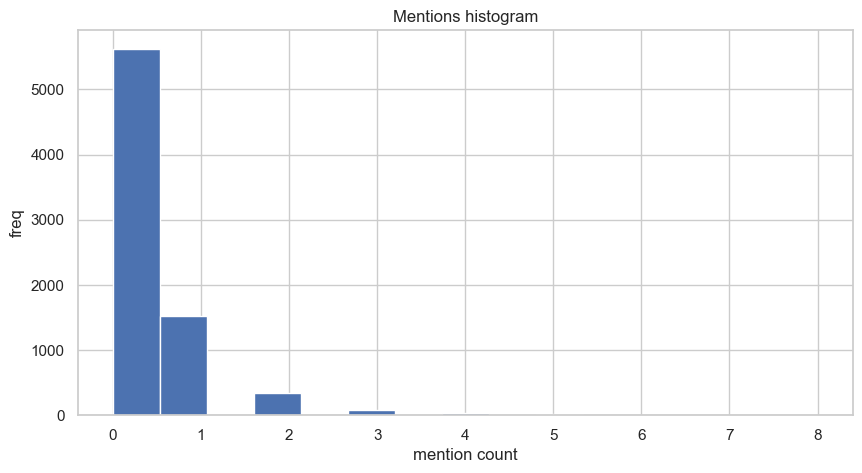

In [87]:
plot = train_df["mentions"].hist(bins=15)
plot.set_title('Mentions histogram')
plot.set_ylabel('freq')
plot.set_xlabel('mention count')
plot.figure.savefig("mentions.png")

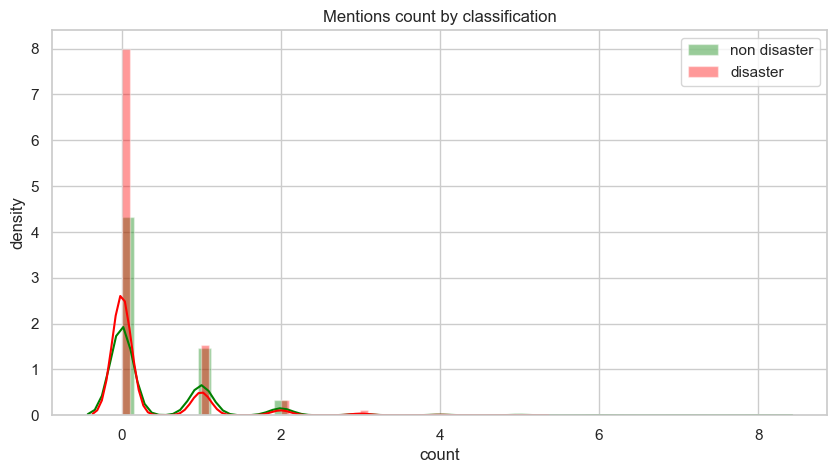

In [88]:
x = train_df[train_df["target"] == 0]["mentions"]
y = train_df[train_df["target"] == 1]["mentions"]

plt.figure()
sns.distplot(x, label='non disaster', color="green")
sns.distplot(y, label='disaster', color="red")
plt.legend()
plt.title('Mentions count by classification')
plt.xlabel('count')
plt.ylabel('density')

plt.show()

### Most of the tweets dont have hashtags or mentions

In [89]:
# Tokenize
train_df['words'] = train_df.text.str.strip().str.split('[\W_]+')
train_df.head()

,id,keyword,location,text,target,words_count,length,links,stopwords,hashtags,mentions,numerics,upper,avg_word,links2,words
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,13,69,0,5,1,0,0,1,4.38,0,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,7,38,0,0,0,0,0,0,4.57,0,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,22,133,0,9,0,0,0,0,5.09,0,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,8,65,0,1,1,0,0,0,7.12,0,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,16,88,0,6,2,0,0,0,4.50,0,"[just, got, sent, this, photo, from, ruby, ala..."


In [90]:
disaster = train_df[train_df['target']==1]
rows = list()
for row in disaster[['id', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.id, word))

words = pd.DataFrame(rows, columns=['tw_id', 'word'])
words.head()

,tw_id,word
0,1,our
1,1,deeds
2,1,are
3,1,the
4,1,reason


In [91]:
words = words[words.word.str.len() > 0]
words.head()

,tw_id,word
0,1,our
1,1,deeds
2,1,are
3,1,the
4,1,reason


In [123]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word

def standarize(df):
    # Spelling corrections
#     df['n_text'] = df['text'].apply(lambda x: str(TextBlob(x).correct())) ### TOO SLOW
    # Steamming
    st = PorterStemmer()
    df['n_text'] = df['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
    # Lemmatization
    df['n_text'] = df['n_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    return df

def joinTerms(df):
    grouped = df.groupby('n_text').agg({'frequency':'mean'})
    grouped = grouped.reset_index()
    return grouped.sort_values(by=['frequency'], ascending=False)

def raw_ngrams(serie, low=2, high=6):
    # from: https://stackoverflow.com/questions/36572221/how-to-find-ngram-frequency-of-a-column-in-a-pandas-dataframe
    word_vectorizer = CountVectorizer(ngram_range=(low, high), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(serie)
    frequencies = sum(sparse_matrix).toarray()[0]
    data = {
        'text': word_vectorizer.get_feature_names(),
        'frequency': frequencies
    }
    df = pd.DataFrame(data)
    return df

# filter those terms with more thatn 50% of stopwords
def filter_n_gram_by_stopwords(df):
    df['stop_words'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
    df['word_count'] = df['text'].apply(lambda x: len(x.split()))
    df['sw_percentage'] = df['stop_words']/df['word_count']
    return df[df['sw_percentage']< 0.5]
        
def n_grams_standarized(series, low=2, high=6):
    ngrams = raw_ngrams(series, low, high)
    ngrams_no_spw = filter_n_gram_by_stopwords(ngrams)
    standarized = standarize(ngrams_no_spw)
    return joinTerms(standarized).sort_values(by=['frequency'], ascending=False)

top_n_grams = n_grams_standarized(train_df['text'])
top_n_grams[:60]

,n_text,frequency
29203,burn build,46.00
200849,youtub video,43.00
102220,like youtub,42.00
102221,like youtub video,42.00
120417,northern california,41.00
125382,oil spill,39.00
42729,cross bodi,39.00
3917,70 year,31.00
162197,suicid bomber,30.00
136359,prebreak best,30.00


In [121]:
top_n_grams.describe()

,frequency
count,"201,963.00"
mean,1.23
std,1.31
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,46.00


In [118]:
# Lets see what happens for non disaster tws
top_n_grams_non_disaster = n_grams_standarized(train_df[train_df['target'] == 0]['text'])
top_n_grams_non_disaster[:60]

,n_text,frequency
23630,cross bodi,38.00
116045,youtub video,36.00
58367,like youtub,35.00
58368,like youtub video,35.00
38824,full reû_,25.00
38817,full read,22.00
16176,burn build,22.00
22321,content polici,20.00
107366,via youtub,18.00
80958,reddit will now quarantin offens content,18.00


In [120]:
top_n_grams_disaster = n_grams_standarized(train_df[train_df['target'] == 1]['text'])
top_n_grams_disaster[:60]

,n_text,frequency
54028,northern california,41.00
56481,oil spill,38.00
72893,suicid bomber,30.00
2243,70 year,30.00
37079,home raze by,29.00
50741,more home raze,29.00
37078,home raze,29.00
54050,northern california wildfir,29.00
60191,pkk suicid,28.00
72946,suicid bomber who,28.00


As we can see a lot of the n-grams with n > 3 are way too specific so we will discard them.
We will work also with 2-grams and 3-grams with a frequency > 10

In [126]:
n_grams_non_disaster = n_grams_standarized(train_df[train_df['target'] == 0]['text'], 2, 3)
n_grams_non_disaster = n_grams_non_disaster[n_grams_non_disaster['frequency']>10]

n_grams_disaster = n_grams_standarized(train_df[train_df['target'] == 1]['text'], 2, 3)
n_grams_disaster = n_grams_disaster[n_grams_disaster['frequency']>10]
n_grams_non_disaster

,n_text,frequency
22037,northern california,41.00
22877,oil spill,38.00
989,70 year,30.00
29617,suicid bomber,30.00
15186,home raze,29.00
...,...,...
32915,two giant crane,11.00
29838,suspect dead,11.00
24787,possibl ebola,11.00
32973,typhoon soudelor,10.50


In [188]:
n_grams_non_disaster

,n_text,frequency
10047,cross bodi,38.00
48626,youtub video,36.00
24803,like youtub,35.00
24804,like youtub video,35.00
16588,full reû_,25.00
...,...,...
11375,desol of smaug,11.00
1333,ad video to,11.00
1332,ad video,11.00
23584,ladi shoulder tote,11.00


In [190]:
len(set(n_grams_non_disaster['n_text']) - set(n_grams_disaster['n_text']))

111

In [191]:
len(set(n_grams_disaster['n_text']) - set(n_grams_non_disaster['n_text']))

269

There are 111 frequent terms used for non disaster tweets and 269 used for disaster ones

In [193]:
set(n_grams_non_disaster['n_text']) - set(n_grams_disaster['n_text'])

{'2015 prebreak',
 '2015 prebreak best',
 'a sound wave',
 'about trap miner',
 'ad video',
 'ad video to',
 'ban or quarantin',
 'bang nearbi',
 'bang nearbi in',
 'black hat',
 'black hat 2015',
 'blast of wind',
 'bodi bag',
 'break news',
 'break news unconfirm',
 'comput to send',
 'content polici',
 'content polici goe',
 'cree led',
 'cree led work',
 'cross bodi',
 'cross bodi bag',
 'data a sound',
 'desol of smaug',
 'dont know',
 'effect mani',
 'effect mani horribl',
 'fan armi',
 'faux leather',
 'first respond',
 'for fan armi',
 'full read',
 'full read by',
 'full reû_',
 'funtenna hijack',
 'funtenna hijack comput',
 'goe into effect',
 'hat 2015',
 'hat 2015 prebreak',
 'heard loud',
 'heard loud bang',
 'hijack comput',
 'hijack comput to',
 'hollywood movi',
 'hollywood movi about',
 'horribl subreddit',
 'horribl subreddit ban',
 'hot funtenna',
 'hot funtenna hijack',
 'ignit knock',
 'ignit knock deton',
 'into effect mani',
 'just heard loud',
 'knock deton',
 '

In [195]:
set(n_grams_disaster['n_text']) - set(n_grams_non_disaster['n_text'])

{'11yearold boy',
 '12000 nigerian',
 '12000 nigerian refuge',
 '15 in saudi',
 '16yr old',
 '16yr old pkk',
 '40 famili',
 '40 famili affect',
 '70 year',
 '70 year after',
 '70th anniversari',
 '70th anniversari of',
 'abc news',
 'after atom bomb',
 'after exchang shot',
 'after wave isra',
 'air ambul helicopt',
 'aircraft debri',
 'aircraft debri found',
 'airport get',
 'airport get swallow',
 'ambul helicopt',
 'ambul helicopt crash',
 'amid crisi',
 'amid crisi famin',
 'anniversari of hiroshima',
 'anthrax lab',
 'anthrax lab mishap',
 'armi trench',
 'armi trench releas',
 'atom bomb japan',
 'attack by muslim',
 'august 05',
 'august 05 at',
 'been costlier bigger',
 'bestnaijamad bestnaijamad',
 'bigger than project',
 'bioterror germ',
 'bioterror germ in',
 'bodi from water',
 'bomb in turkey',
 'bomb japan',
 'bomb japan still',
 'bomber kill 15',
 'bomber who deton',
 'bu hijack',
 'bush fire',
 'by northern california',
 'california wildfir',
 'california wildfir abc',

Lets take a look at repeats

In [128]:
train_df[train_df['text'].str.contains('homes razed by northern california wildfire')]['text']

5579    the latest more homes razed by northern califo...
5581    the latest more homes razed by northern califo...
5582    the latest more homes razed by northern califo...
5583    the latest more homes razed by northern califo...
5584    the latest more homes razed by northern califo...
5585    the latest more homes razed by northern califo...
5586    news the latest more homes razed by northern c...
5587    the latest more homes razed by northern califo...
5588    the latest more homes razed by northern califo...
5589    the latest more homes razed by northern califo...
5590    the latest more homes razed by northern califo...
5591    the latest more homes razed by northern califo...
5593    the latest more homes razed by northern califo...
5594    the latest more homes razed by northern califo...
5595    the latest more homes razed by northern califo...
5597    the latest more homes razed by northern califo...
5598    the latest more homes razed by northern califo...
5599    the la

In [182]:
repeats = train_df.groupby(['target','text']).agg({ 'id':'count'})
repeats = repeats.reset_index()
repeats.rename(columns={'id':'count'}, inplace=True)
repeats = repeats[repeats['count'] > 5]

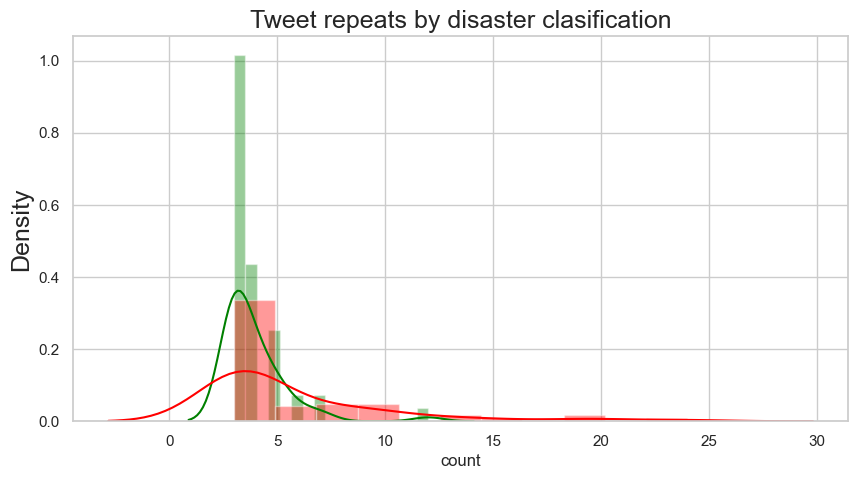

In [180]:
plot = sns.distplot(repeats[repeats['target']==0]["count"], color="green", label='Fake disasters', hist=True)
plot = sns.distplot(repeats[repeats['target']==1]["count"], color="red", label='Real disasters', hist=True)

plot.set_title("Tweet repeats by disaster clasification", fontsize=18)
plot.set_ylabel("Density", fontsize=18)
plot.figure.savefig('tweet repeats.png', dpi=100)

In [185]:
repeats['count'].sum()

257